In [1]:
import numpy as np
from models import SensorModel, State, GroundTruth, CVMotionModel, CVMeasModel
from densities import GaussianDensity
from utils import object_data_gen, meas_data_gen, RMSE
from object_trackers import SingleObjectTracker
from scipy.stats.distributions import chi2
import matplotlib.pyplot as plt

In [2]:
# Sensor Model
P_D = 0.9
lambda_c = 10
range_c = np.array([[-1000, 1000],[-1000, 1000]])
sensor_model = SensorModel(P_D, lambda_c, range_c)

In [3]:
# Data gen init
K = 100
nbirths = 1
tbirth = [0]
tdeath = [K + 1]
x = np.array([0., 0., 10., 10.], dtype=float)
P = np.eye(4)
initial_state = State(x, P)
ground_truth = GroundTruth(nbirths, np.array([[0., 0., 10., 10.]], dtype=float).T, tbirth, tdeath, K)

In [4]:
# Motion Model (constant velocity)
T = 1
sigma_q = 5
motion_model = CVMotionModel(T, sigma_q)

In [5]:
# Measurement Model (constant velocity)
sigma_r = 10
meas_model = CVMeasModel(sigma_r)

In [6]:
# Data gen
noisy = False
X, N = object_data_gen(ground_truth, motion_model, noisy)
meas_data = meas_data_gen(X, N, sensor_model, meas_model)

In [7]:
# Density & Tracker init (gaussian density & single object)
P_G = 0.999
w_min = 1e-3
merging_threshold = 2
M = 100
dim = 2
gating = chi2.ppf(P_G, dim)
density = GaussianDensity(motion_model, meas_model, gating, merging_threshold)
sot = SingleObjectTracker(density, sensor_model, motion_model, meas_model, w_min, M)

In [8]:
NNestimates = sot.nearest_neighbor(initial_state, meas_data)
PDAestimates = sot.prob_data_assoc(initial_state, meas_data)
GSestimates = sot.gaussian_sum(initial_state, meas_data)

In [9]:
NNrmse = RMSE(NNestimates, X)
PDArmse = RMSE(PDAestimates, X)
GSrmse = RMSE(GSestimates, X)

print(NNrmse, PDArmse, GSrmse)

7.545666959464128 7.531948451885379 7.559336501949727


In [10]:
gt = np.array(X)[:,:2,0]
nn = np.array(NNestimates)[:,:2]
pda = np.array(PDAestimates)[:,:2]
gs = np.array(GSestimates)[:,:2]

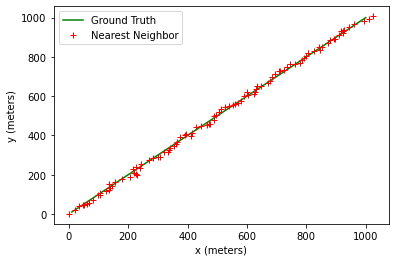

In [11]:
plt.plot(gt[:,0], gt[:,1], 'g')
plt.plot(nn[:,0], nn[:,1], 'r+')
plt.legend(['Ground Truth', 'Nearest Neighbor'])
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.show()

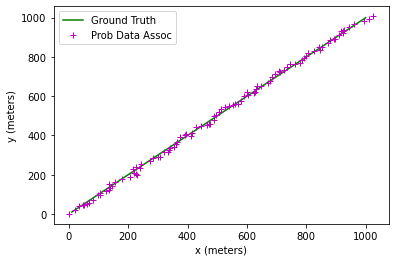

In [12]:
plt.plot(gt[:,0], gt[:,1], 'g')
plt.plot(pda[:,0], pda[:,1], 'm+')
plt.legend(['Ground Truth', 'Prob Data Assoc'])
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.show()

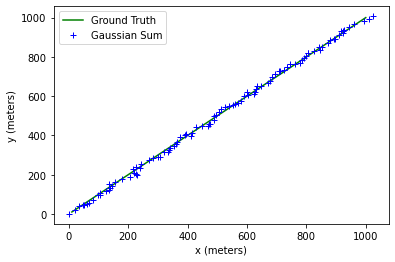

In [13]:
plt.plot(gt[:,0], gt[:,1], 'g')
plt.plot(gs[:,0], gs[:,1], 'b+')
plt.legend(['Ground Truth', 'Gaussian Sum'])
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.show()